The is the notebook for the DC properies 

In [69]:
import numpy as np 
import pandas as pd

In [70]:
dc_residential= pd.read_csv('dc_esidential.csv', index_col='SSL')

In [71]:
dc_condo= pd.read_csv('dc_condo.csv', index_col='SSL')

In [72]:
address_points= pd.read_csv('address_points.csv')

/var/folders/vs/h329g4pd3s5bxc9z4khp1vw00000gn/T/ipykernel_1095/2452612820.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  address_points= pd.read_csv('address_points.csv')


In [73]:
df = pd.concat([dc_residential,dc_condo], sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167286 entries, 0133    0106 to 6208    2011
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BATHRM             165599 non-null  float64
 1   HF_BATHRM          165491 non-null  float64
 2   HEAT               165593 non-null  float64
 3   HEAT_D             165593 non-null  object 
 4   AC                 165595 non-null  object 
 5   NUM_UNITS          107036 non-null  float64
 6   ROOMS              165507 non-null  float64
 7   BEDRM              165582 non-null  float64
 8   AYB                167263 non-null  float64
 9   YR_RMDL            89739 non-null   float64
 10  EYB                167286 non-null  int64  
 11  STORIES            106949 non-null  float64
 12  SALEDATE           167286 non-null  object 
 13  PRICE              150075 non-null  float64
 14  QUALIFIED          167285 non-null  object 
 15  SALE_NUM           167286 non-null  int

In [74]:
df.head()
df.shape

(167286, 40)

In [75]:
#Next, eliminate redundant dummy codes for categorical values.

#Identify all categorical variables
categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE_D','STYLE'],['STRUCT_D','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
cat_drop = []
for c in categories:
    df[c[1]] = df[c[0]].astype('category')
    cat_drop.append(c[0])

#eliminate redundant dummy variables
df.drop(cat_drop, inplace=True, axis=1)

In [76]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,CMPLX_NUM,LIVING_GBA
SSL,,,,,,,,,,,,,,,,,,,,,
0133 0106,3.0,1.0,Hot Water Rad,N,4.0,12.0,4.0,1914.0,1987.0,1967,...,Metal- Sms,Hardwood,4.0,0.0,24,2208,2022/07/26 05:17:19+00,71045285,NaN,NaN
0133 0114,4.0,0.0,Hot Water Rad,N,4.0,12.0,4.0,1900.0,2012.0,1974,...,Built Up,Hardwood,4.0,4.0,24,1368,2022/07/26 05:17:19+00,71045286,NaN,NaN
0133 0116,4.0,1.0,Hot Water Rad,Y,2.0,8.0,4.0,1910.0,2013.0,1976,...,Built Up,Hardwood,2.0,2.0,24,1012,2022/07/26 05:17:19+00,71045287,NaN,NaN
0133 0117,3.0,0.0,Hot Water Rad,Y,3.0,6.0,3.0,1895.0,2007.0,1976,...,Built Up,Hardwood,3.0,0.0,24,880,2022/07/26 05:17:19+00,71045288,NaN,NaN
0133 0123,3.0,0.0,Warm Cool,Y,2.0,8.0,4.0,1900.0,2019.0,1976,...,Built Up,Hardwood,2.0,1.0,24,792,2022/07/26 05:17:19+00,71045289,NaN,NaN


In [77]:
print(df.isnull().sum())

BATHRM                 1687
HF_BATHRM              1795
HEAT                   1693
AC                     1691
NUM_UNITS             60250
ROOMS                  1779
BEDRM                  1704
AYB                      23
YR_RMDL               77547
EYB                       0
STORIES               60337
SALEDATE                  0
PRICE                 17211
QUALIFIED                 1
SALE_NUM                  0
GBA                   59001
BLDG_NUM                  0
STYLE                 60251
STRUCT                60250
GRADE                 60250
CNDTN                 60250
EXTWALL               60250
ROOF                  60250
INTWALL               60250
KITCHENS              60251
FIREPLACES             1873
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
OBJECTID                  0
CMPLX_NUM            108285
LIVING_GBA           108285
dtype: int64


In [78]:
#It seems like there a few dozen entries that are missing key descriptors. Let's remove these rows.
df.dropna(subset=['ROOMS','BEDRM','BATHRM','HF_BATHRM','FIREPLACES','EYB','QUALIFIED'], inplace=True)

print(df.isnull().sum())

BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             58266
ROOMS                     0
BEDRM                     0
AYB                      20
YR_RMDL               75654
EYB                       0
STORIES               58340
SALEDATE                  0
PRICE                 17203
QUALIFIED                 0
SALE_NUM                  0
GBA                   58266
BLDG_NUM                  0
STYLE                 58266
STRUCT                58266
GRADE                 58266
CNDTN                 58266
EXTWALL               58266
ROOF                  58266
INTWALL               58266
KITCHENS              58267
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
OBJECTID                  0
CMPLX_NUM            106956
LIVING_GBA           106956
dtype: int64


In [79]:
#change data types to integer.

int_col = ['BATHRM','HF_BATHRM','ROOMS','BEDRM','EYB','SALE_NUM','BLDG_NUM','FIREPLACES','LANDAREA']
#con_col = ['BATHRM','HF_BATHRM','NUM_UNITS','ROOMS','BEDRM','EYB','STORIES','SALE_NUM','KITCHENS','FIREPLACES','LANDAREA']

for i in int_col:
    df[i] = df[i].astype('int64')

In [80]:
# checking the datetime range 
print(df["SALEDATE"].sort_values(ascending=True).head(5))

SSL
2663    2018    1900/01/01 00:00:00+00
5483    0802    1900/01/01 00:00:00+00
3811    0101    1900/01/01 00:00:00+00
2222    2118    1900/01/01 00:00:00+00
5484    0030    1900/01/01 00:00:00+00
Name: SALEDATE, dtype: object


In [81]:
print(df["SALEDATE"].sort_values(ascending=False).head(5))

SSL
4473    2071    2022/07/20 00:00:00+00
1601    2411    2022/07/20 00:00:00+00
2106    2119    2022/07/20 00:00:00+00
1601    2036    2022/07/20 00:00:00+00
2528    2233    2022/07/20 00:00:00+00
Name: SALEDATE, dtype: object


In [82]:
#change data type to datetime for appropriate columns:

df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], dayfirst=False)
df['GIS_LAST_MOD_DTTM'] = pd.to_datetime(df['GIS_LAST_MOD_DTTM'], dayfirst=False)

In [83]:
print(df['SALEDATE'].head(5))

SSL
0133    0106   2021-12-21 00:00:00+00:00
0133    0114   2019-05-08 00:00:00+00:00
0133    0116   2022-05-13 00:00:00+00:00
0133    0117   1900-01-01 00:00:00+00:00
0133    0123   2021-05-27 00:00:00+00:00
Name: SALEDATE, dtype: datetime64[ns, UTC]


In [84]:
address_points.head()

,X,Y,SITE_ADDRESS_PK,ADDRESS_ID,ROADWAYSEGID,STATUS,SSL,TYPE_,ENTRANCETYPE,ADDRNUM,...,WARD_2012,ANC_2002,ANC_2012,SMD_2002,SMD_2012,OBJECTID_12,OBJECTID,OBJECTID_1,ANC_2023,SMD_2023
0,-77.000353,38.892195,27746,27746,11690.0,ACTIVE,0814 0018,ADDRESS,OFFICIAL,402.0,...,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03,832017,1087.0,1509.0,ANC 6C,SMD 6C02
1,-76.999249,38.892652,50808,50808,3073.0,ACTIVE,0838 0027,ADDRESS,OFFICIAL,219.0,...,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03,832018,3265.0,1509.0,ANC 6C,SMD 6C03
2,-76.999769,38.892558,51065,51065,3073.0,ACTIVE,0814 0818,ADDRESS,OFFICIAL,216.0,...,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03,832019,3266.0,1509.0,ANC 6C,SMD 6C02
3,-76.999231,38.892546,51219,51219,3073.0,ACTIVE,0838 0041,ADDRESS,OFFICIAL,215.0,...,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03,832020,3267.0,1509.0,ANC 6C,SMD 6C03
4,-76.997461,38.892194,3171,3171,9646.0,ACTIVE,0866 0013,ADDRESS,OFFICIAL,626.0,...,Ward 6,ANC 6C,ANC 6C,SMD 6C07,SMD 6C03,832021,1.0,1510.0,ANC 6C,SMD 6C03


In [85]:
address_points['SSL'].isnull().sum()

361

In [86]:
address_required = address_points.drop_duplicates(['SSL'], keep='last').set_index("SSL")[["FULLADDRESS","CITY","STATE","ZIPCODE","NATIONALGRID","LATITUDE","LONGITUDE","ASSESSMENT_NBHD","ASSESSMENT_SUBNBHD","CENSUS_TRACT","CENSUS_BLOCK","WARD"]]

In [87]:
pre_working_dc_property_data= pd.merge(df,address_required,how="left",on="SSL")

In [88]:
pre_working_dc_property_data.head(5)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD
SSL,,,,,,,,,,,,,,,,,,,,,
0133 0106,3,1,Hot Water Rad,N,4.0,12,4,1914.0,1987.0,1967,...,DC,20009.0,18S UJ 22930 09206,38.913912,-77.042316,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0114,4,0,Hot Water Rad,N,4.0,12,4,1900.0,2012.0,1974,...,DC,20009.0,18S UJ 22857 09205,38.913884,-77.043162,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0116,4,1,Hot Water Rad,Y,2.0,8,4,1910.0,2013.0,1976,...,DC,20009.0,18S UJ 22872 09208,38.913919,-77.042982,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0117,3,0,Hot Water Rad,Y,3.0,6,3,1895.0,2007.0,1976,...,DC,20009.0,18S UJ 22878 09208,38.913919,-77.042923,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0123,3,0,Warm Cool,Y,2.0,8,4,1900.0,2019.0,1976,...,DC,20009.0,18S UJ 22967 09164,38.913535,-77.041884,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2


In [89]:
pre_working_dc_property_data.shape

(165222, 44)

In [90]:
pre_working_dc_property_data.to_csv('pre_dc_property_data.csv')

In [91]:
pre_working_dc_property_data.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD
SSL,,,,,,,,,,,,,,,,,,,,,
0133 0106,3,1,Hot Water Rad,N,4.0,12,4,1914.0,1987.0,1967,...,DC,20009.0,18S UJ 22930 09206,38.913912,-77.042316,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0114,4,0,Hot Water Rad,N,4.0,12,4,1900.0,2012.0,1974,...,DC,20009.0,18S UJ 22857 09205,38.913884,-77.043162,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0116,4,1,Hot Water Rad,Y,2.0,8,4,1910.0,2013.0,1976,...,DC,20009.0,18S UJ 22872 09208,38.913919,-77.042982,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0117,3,0,Hot Water Rad,Y,3.0,6,3,1895.0,2007.0,1976,...,DC,20009.0,18S UJ 22878 09208,38.913919,-77.042923,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2
0133 0123,3,0,Warm Cool,Y,2.0,8,4,1900.0,2019.0,1976,...,DC,20009.0,18S UJ 22967 09164,38.913535,-77.041884,Old City 2,040 D Old City 2,4202.0,004202 1001,Ward 2


In [92]:
pre_working_dc_property_data.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,FIREPLACES,USECODE,LANDAREA,OBJECTID,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,165222.000000,165222.000000,106956.000000,165222.000000,165222.000000,165202.000000,89568.000000,165222.000000,106882.000000,1.480190e+05,...,165222.000000,165222.000000,165222.000000,1.652220e+05,58266.000000,58266.000000,106260.000000,106260.000000,106260.000000,106206.000000
mean,1.864715,0.464508,1.195370,6.112570,2.736869,1940.820450,2001.523368,1967.585340,2.083503,9.067824e+05,...,0.483543,14.332649,2402.671557,5.958256e+07,2739.076700,896.514726,20012.104705,38.916564,-77.009875,5570.957667
std,1.001316,0.586285,0.590416,2.666649,1.380860,83.664648,87.750510,27.039401,0.982883,8.420362e+06,...,6.617049,3.684966,5019.263857,1.604510e+07,1548.097151,421.388317,7.691487,0.034878,0.043222,3502.039068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,202.000000,0.000000,0.000000,0.000000e+00,...,0.000000,11.000000,0.000000,3.781411e+07,1001.000000,0.000000,20001.000000,38.819731,-77.113909,101.000000
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1989.000000,1958.000000,2.000000,0.000000e+00,...,0.000000,11.000000,611.000000,3.785604e+07,1604.000000,621.000000,20007.000000,38.892538,-77.035278,2002.000000
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1938.000000,2006.000000,1968.000000,2.000000,3.300000e+05,...,0.000000,13.000000,1600.000000,7.139561e+07,2385.000000,788.000000,20011.000000,38.917687,-77.005624,6802.000000
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1963.000000,2013.000000,1980.000000,2.000000,6.350000e+05,...,1.000000,17.000000,2905.000000,7.143752e+07,3063.000000,1070.000000,20018.000000,38.944270,-76.982937,8804.000000
max,24.000000,12.000000,12.000000,101.000000,24.000000,2023.000000,20212.000000,2023.000000,275.000000,1.659895e+08,...,2555.000000,117.000000,942632.000000,7.147922e+07,7091.000000,10134.000000,20052.000000,38.995540,-76.909758,11100.000000


In [93]:
for col in pre_working_dc_property_data.columns:
    print(col)

BATHRM
HF_BATHRM
HEAT
AC
NUM_UNITS
ROOMS
BEDRM
AYB
YR_RMDL
EYB
STORIES
SALEDATE
PRICE
QUALIFIED
SALE_NUM
GBA
BLDG_NUM
STYLE
STRUCT
GRADE
CNDTN
EXTWALL
ROOF
INTWALL
KITCHENS
FIREPLACES
USECODE
LANDAREA
GIS_LAST_MOD_DTTM
OBJECTID
CMPLX_NUM
LIVING_GBA
FULLADDRESS
CITY
STATE
ZIPCODE
NATIONALGRID
LATITUDE
LONGITUDE
ASSESSMENT_NBHD
ASSESSMENT_SUBNBHD
CENSUS_TRACT
CENSUS_BLOCK
WARD


In [94]:
pre_working_dc_property_data.shape

(165222, 44)

In [95]:
df = df.reset_index()

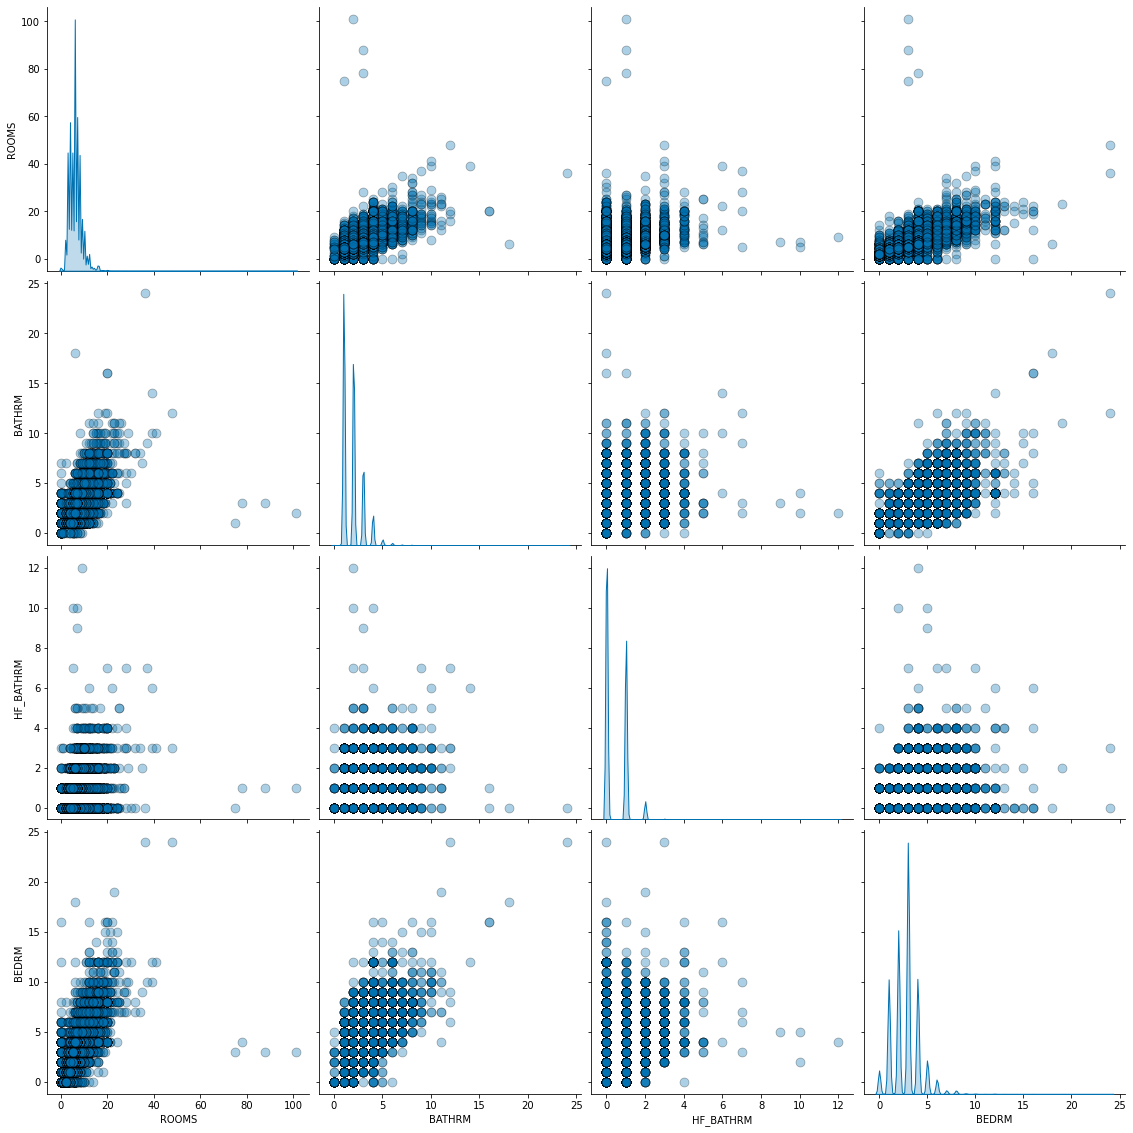

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')
# Basic correlogram
sns.pairplot(df[['ROOMS','BATHRM','HF_BATHRM','BEDRM']], kind="scatter", diag_kind = 'kde', plot_kws = {'alpha': 0.33, 's': 80, 'edgecolor': 'k'}, height = 4)
plt.show()